In [1]:
from plotnine import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
import warnings
warnings.filterwarnings('ignore')
theme_set(theme_light())

%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Line Plot

## Basic Line Plot

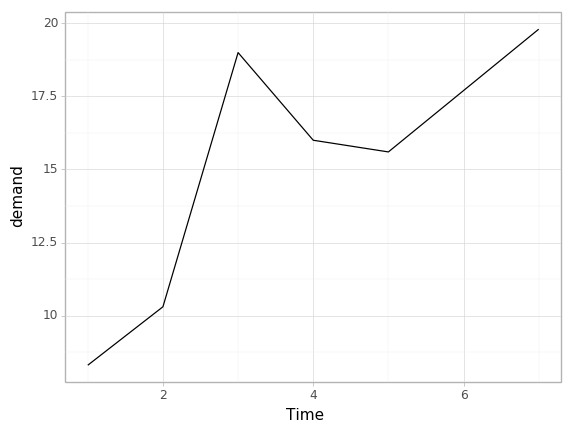

<ggplot: (-9223371892072154315)>

In [10]:
(ggplot(BOD,aes("Time",'demand')) +
 geom_line()
)

## Points in Line Plot

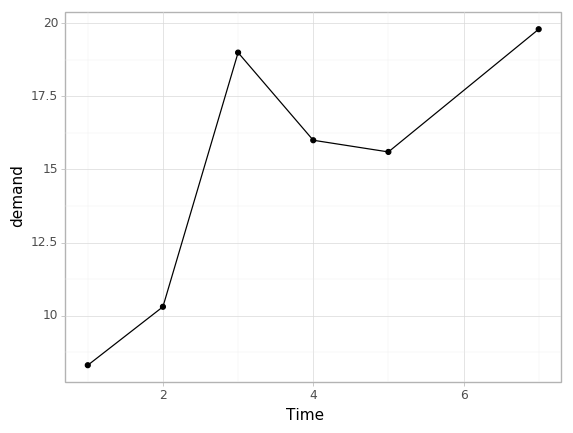

<ggplot: (-9223371892071996202)>

In [11]:
(ggplot(BOD,aes("Time",'demand')) +
 geom_line() + geom_point()
)

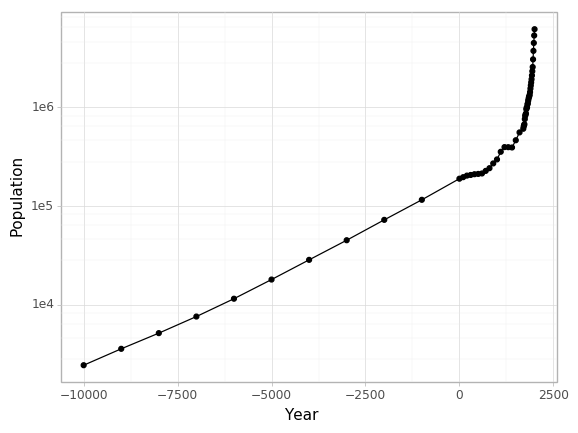

<ggplot: (-9223371892071896425)>

In [12]:
(ggplot(worldpop,aes('Year','Population')) + 
 geom_line() + geom_point() + scale_y_log10()
)

## Line Plot With Multiple Lines

In [13]:
tg = ToothGrowth.groupby(['supp','dose']).sum()
tg.reset_index(level=['supp', 'dose'],inplace=True)

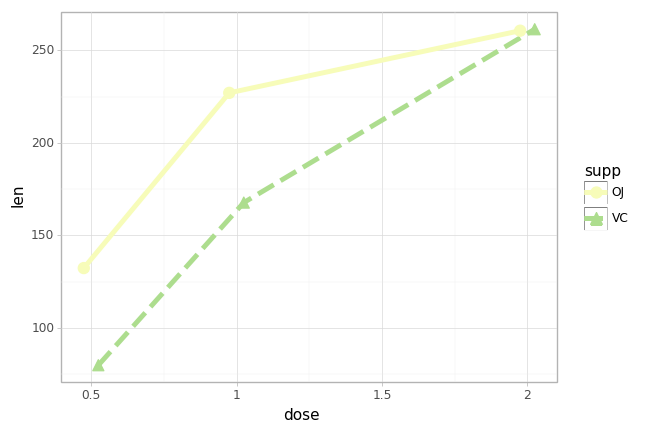

<ggplot: (144782825820)>

In [14]:
(ggplot(tg,aes(x='dose',y='len',color='supp',linetype='supp',shape='supp')) +
 geom_line(position=position_dodge(0.1),size=2) + geom_point(position=position_dodge(0.1),size=4) +
 scale_colour_brewer(palette="YlGn")
)

## Change the Appearance of Lines

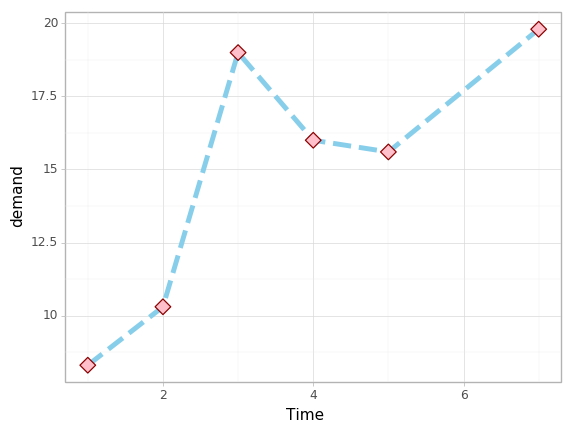

<ggplot: (144782867134)>

In [15]:
(ggplot(BOD, aes(x='Time', y='demand')) +
 geom_line(linetype="--", size=2, color="skyblue") +
 geom_point(size=4,shape='D',color='darkred',fill='pink')
)

## Stacked Area Plot -_- fill can not in order

In [16]:
# age_order ={'<5':1,'5-14':2,'15-24':3,'25-34':4,'35-44':5,'45-54':6,'55-64':7,'>64':8}
# uspopage['age_ord'] = uspopage['AgeGroup'].apply(lambda x: age_order[x])
# uspopage.sort_values('age_ord',inplace=True)

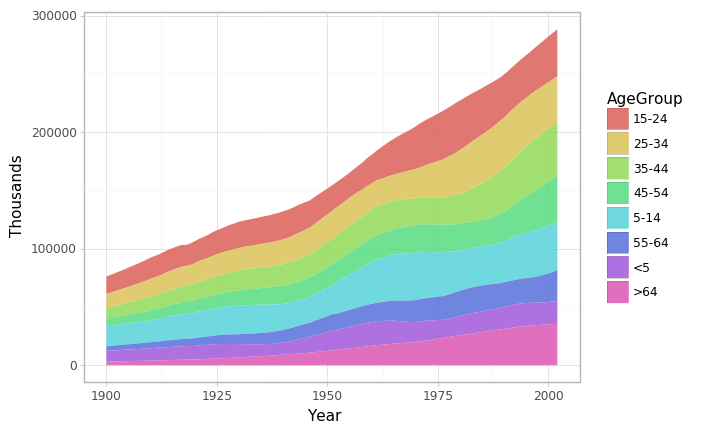

<ggplot: (-9223371853505591317)>

In [9]:
(ggplot(uspopage,aes('Year','Thousands',fill='AgeGroup')) +
 geom_area(alpha=0.85) 
)

## Proportional Stacked Area Plot -_- fill can not in order

In [6]:
uspopage_prop = uspopage.copy()
uspopage_prop['percent'] =uspopage_prop.groupby('Year')['Thousands'].transform(lambda x:x / x.sum() * 100)

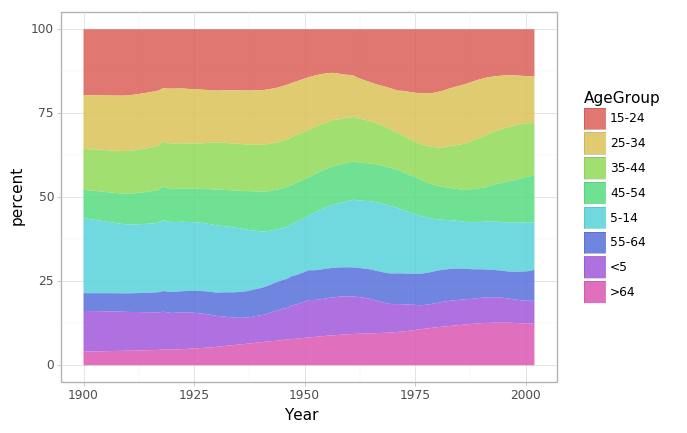

<ggplot: (-9223371853505451155)>

In [10]:
(ggplot(uspopage_prop,aes('Year','percent',fill='AgeGroup')) +
 geom_area(alpha=0.85) 
)

## Confidence Region

In [20]:
clim = climate.loc[climate['Source']=="Berkeley",["Year", "Anomaly10y", "Unc10y"]].copy()

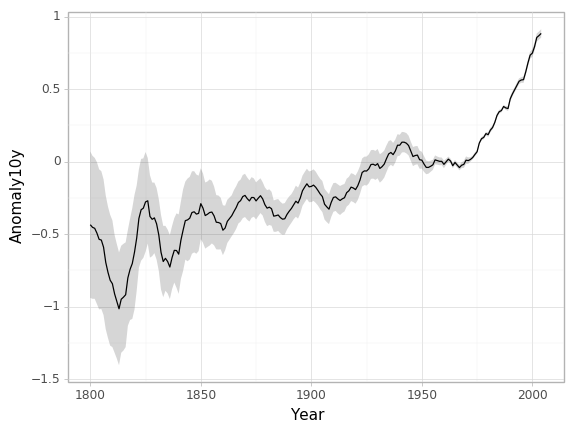

<ggplot: (144784045162)>

In [25]:
(ggplot(clim, aes(x='Year', y='Anomaly10y')) +
 geom_ribbon(aes(ymin='Anomaly10y-Unc10y', ymax='Anomaly10y+Unc10y'),alpha=0.2) +
 geom_line()
)

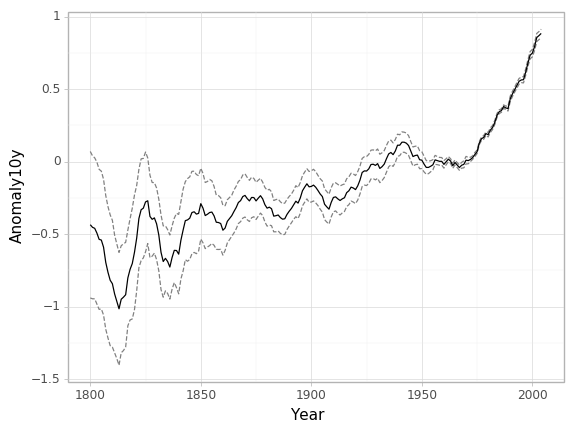

<ggplot: (-9223371892074375494)>

In [26]:
(ggplot(clim, aes(x='Year', y='Anomaly10y')) +
 geom_line(aes(y='Anomaly10y-Unc10y'), colour="grey", linetype="--") +
 geom_line(aes(y='Anomaly10y+Unc10y'), colour="grey", linetype="--") +
 geom_line()
)